# Notes

## total cars in a county

## total population in a county
## total land area in a county

## vehicles per household

## per cent of commute method per county used

## commute time per means of transportation

## for each graph, have an amalgamated total population and total hours spent on commuting

## the data is processed grouped by population density and then averaged per normalized weighing by total population



# Data Prep

In [17]:

# Init
# choropleth
from __future__ import division
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# NOTE - THIS TAKES AROUND 13 MINUTES

# OLD # skips the 2nd row that contains indexing names
# Now looking at the row that is consistent between 2009 and 2019 data, using the indexing csv file for guidance.
df_2009 = pd.read_csv('./acs_transportation_data/2009-5yr-transport.csv', na_values=".", skiprows=[0])
df_2014 = pd.read_csv('./acs_transportation_data/2014-5yr-transport.csv', na_values=".", skiprows=[0])
df_2019 = pd.read_csv('./acs_transportation_data/2019-5yr-transport.csv', na_values=".", skiprows=[0])

In [19]:
df_2014.head()

,Geo_FIPS,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,Geo_REGION,...,PCT_ACS14_5yr_B08303004,PCT_ACS14_5yr_B08303005,PCT_ACS14_5yr_B08303006,PCT_ACS14_5yr_B08303007,PCT_ACS14_5yr_B08303008,PCT_ACS14_5yr_B08303009,PCT_ACS14_5yr_B08303010,PCT_ACS14_5yr_B08303011,PCT_ACS14_5yr_B08303012,PCT_ACS14_5yr_B08303013
0,1001,"Autauga County, Alabama","Autauga County, Alabama",al,50,0,ACSSF,13,NaN,NaN,...,9.24,13.83,14.38,9.57,21.51,4.34,3.26,6.13,3.29,2.49
1,1003,"Baldwin County, Alabama","Baldwin County, Alabama",al,50,0,ACSSF,14,NaN,NaN,...,15.28,15.09,13.56,6.00,15.06,2.00,3.18,9.63,6.04,2.14
2,1005,"Barbour County, Alabama","Barbour County, Alabama",al,50,0,ACSSF,15,NaN,NaN,...,15.92,13.01,9.57,4.42,14.25,3.38,2.71,8.06,5.13,2.80
3,1007,"Bibb County, Alabama","Bibb County, Alabama",al,50,0,ACSSF,16,NaN,NaN,...,17.27,9.15,9.42,5.19,16.66,5.66,4.70,13.78,5.51,1.33
4,1009,"Blount County, Alabama","Blount County, Alabama",al,50,0,ACSSF,17,NaN,NaN,...,8.53,7.66,8.28,5.22,14.86,4.51,5.66,18.67,12.31,3.17


In [20]:
# ACS14_5yr_B01001001 = Total Population

df_2014['population_density'] = df_2014['ACS14_5yr_B01001001'] / df_2014['Geo_AREALAND']
df_2014['population_density'] = df_2014['ACS14_5yr_B01001001'] / df_2014['Geo_AREALAND']


In [67]:
# # ACS09_5yr_B01001001 - total_population
# df_2009['total_population'] = df_2009['ACS09_5yr_B01001001']
# df_2009['population_density'] = df_2009['ACS09_5yr_B01001001'] / df_2009['Geo_AREALAND']

# # ACS09_5yr_B08015001 - aggregate_number_of_vehicles
# df_2009['vehicles_density'] = df_2009['ACS09_5yr_B08015001'] / df_2009['Geo_AREALAND']
# df_2009['vehicles_per_individuals'] = df_2009['ACS09_5yr_B08015001'] / df_2009['ACS09_5yr_B01001001']

# # ACS09_5yr_B08015001 - aggregate_number_of_vehicles
# df_2009['vehicles_density'] = df_2009['ACS09_5yr_B08015001'] / df_2009['Geo_AREALAND']
# df_2009['vehicles_per_individuals'] = df_2009['ACS09_5yr_B08015001'] / df_2009['ACS09_5yr_B01001001']

# # aggregate_time_per_worker
# # Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes).4,ACS09_5yr_C08136001
# # "% Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Car, Truck, or Van - Drove Alone",PCT_ACS09_5yr_C08136002
# # "% Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Car, Truck, or Van - Carpooled",PCT_ACS09_5yr_C08136003
# # % Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Public Transportation (Excluding Taxicab),PCT_ACS09_5yr_C08136004
# # "% Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Taxicab, Motorcycle, Bicycle, Walked, or Other Means",PCT_ACS09_5yr_C08136005

# df_2009 = df_2009.dropna(subset=['ACS09_5yr_C08136002', 'ACS09_5yr_C08136001', 'ACS09_5yr_C08136003', 'ACS09_5yr_C08136004', 'ACS09_5yr_C08136005'])

# df_2009['aggregate_time_per_worker_drive_alone'] = df_2009['ACS09_5yr_C08136002'] / df_2009['ACS09_5yr_C08136001']
# df_2009['weighted_aggregate_time_per_worker_drive_alone'] = df_2009['aggregate_time_per_worker_drive_alone'] / df_2009['total_population']
# sum_weighted_aggregate_time_per_worker_drive_alone = sum(df_2009['weighted_aggregate_time_per_worker_drive_alone'])

# df_2009['aggregate_time_per_worker_carpool'] = df_2009['ACS09_5yr_C08136003'] / df_2009['ACS09_5yr_C08136001']
# df_2009['weighted_aggregate_time_per_worker_carpool'] = df_2009['aggregate_time_per_worker_carpool'] / df_2009['total_population']
# sum_weighted_aggregate_time_per_worker_carpool = sum(df_2009['weighted_aggregate_time_per_worker_carpool'])

# df_2009['aggregate_time_per_worker_public_transit'] = df_2009['ACS09_5yr_C08136004'] / df_2009['ACS09_5yr_C08136001']
# df_2009['weighted_aggregate_time_per_worker_public_transit'] = df_2009['aggregate_time_per_worker_public_transit'] / df_2009['total_population']
# sum_weighted_aggregate_time_per_worker_public_transit = sum(df_2009['weighted_aggregate_time_per_worker_public_transit'])

# df_2009['aggregate_time_per_worker_other_means'] = df_2009['ACS09_5yr_C08136005'] / df_2009['ACS09_5yr_C08136001']
# df_2009['weighted_aggregate_time_per_worker_other_means'] = df_2009['aggregate_time_per_worker_other_means'] / df_2009['total_population']
# sum_weighted_aggregate_time_per_worker_other_means = sum(df_2009['weighted_aggregate_time_per_worker_other_means'])



# ACS09_5yr_B01001001 - total_population
df_2009['total_population'] = df_2009['ACS09_5yr_B01001001']
df_2009['population_density'] = df_2009['ACS09_5yr_B01001001'] / df_2009['Geo_AREALAND']

# ACS09_5yr_B08015001 - aggregate_number_of_vehicles
# Workers 16 Years and Over in Households,ACS09_5yr_B08014001
df_2009['vehicles_density'] = df_2009['ACS09_5yr_B08015001'] / df_2009['Geo_AREALAND']
df_2009['vehicles_per_worker'] = df_2009['ACS09_5yr_B08015001'] / df_2009['ACS09_5yr_B08014001']
df_2009['vehicles_per_individual'] = df_2009['ACS09_5yr_B08015001'] / df_2009['total_population']

# aggregate_time_per_worker
# Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes).4,ACS09_5yr_C08136001
# "% Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Car, Truck, or Van - Drove Alone",PCT_ACS09_5yr_C08136002
# "% Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Car, Truck, or Van - Carpooled",PCT_ACS09_5yr_C08136003
# % Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Public Transportation (Excluding Taxicab),PCT_ACS09_5yr_C08136004
# "% Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Taxicab, Motorcycle, Bicycle, Walked, or Other Means",PCT_ACS09_5yr_C08136005

df_2009 = df_2009.dropna(subset=['ACS09_5yr_C08136001', 'ACS09_5yr_C08136002', 'ACS09_5yr_C08136003', 'ACS09_5yr_C08136004', 'ACS09_5yr_C08136005'])

# "Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Car, Truck, or Van - Drove Alone",ACS09_5yr_C08136002
# "Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone.1",ACS09_5yr_C08134011
df_2009['average_commute_time_per_worker_drive_alone'] = df_2009['ACS09_5yr_C08136002'] / df_2009['ACS09_5yr_C08134011']
average_commute_time_per_worker_drive_alone = sum(df_2009['ACS09_5yr_C08136002']) / sum(df_2009['ACS09_5yr_C08134011'])

# "Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Car, Truck, or Van - Carpooled",ACS09_5yr_C08136003
# "Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled.1",ACS09_5yr_C08134021
df_2009['average_commute_time_per_worker_carpool'] = df_2009['ACS09_5yr_C08136003'] / df_2009['ACS09_5yr_C08134021']
average_commute_time_per_worker_carpool = sum(df_2009['ACS09_5yr_C08136003']) / sum(df_2009['ACS09_5yr_C08134021'])

# Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Public Transportation (Excluding Taxicab),ACS09_5yr_C08136004
# Workers 16 Years and Over Who Did Not Work At Home: Public Transportation (Excluding Taxicab).1,ACS09_5yr_C08134031
df_2009['average_commute_time_per_worker_public_transit'] = df_2009['ACS09_5yr_C08136004'] / df_2009['ACS09_5yr_C08134031']
average_commute_time_per_worker_public_transit = sum(df_2009['ACS09_5yr_C08136004']) / sum(df_2009['ACS09_5yr_C08134031'])

# "Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Taxicab, Motorcycle, Bicycle, Walked, or Other Means",ACS09_5yr_C08136005
# "Workers 16 Years and Over Who Did Not Work At Home: Taxicab, Motorcycle, Bicycle,  Walked, or Other Means",ACS09_5yr_C08134041
df_2009['average_commute_time_per_worker_other_means'] = df_2009['ACS09_5yr_C08136005'] / df_2009['ACS09_5yr_C08134041']
average_commute_time_per_worker_other_means = sum(df_2009['ACS09_5yr_C08136005']) / sum(df_2009['ACS09_5yr_C08134041'])





In [31]:
BROWN = "#AD8C97"
BROWN_DARKER = "#7d3a46"
GREEN = "#2FC1D3"
BLUE = "#076FA1"
GREY = "#C7C9CB"
GREY_DARKER = "#5C5B5D"
RED = "#E3120B"

In [58]:
year = [2008,2018]

latin_america = [sum_weighted_aggregate_time_per_worker_drive_alone,sum_weighted_aggregate_time_per_worker_drive_alone]
asia_and_pacific = [sum_weighted_aggregate_time_per_worker_carpool,sum_weighted_aggregate_time_per_worker_carpool]
sub_saharan_africa = [sum_weighted_aggregate_time_per_worker_public_transit,sum_weighted_aggregate_time_per_worker_public_transit]
sub_saharan_africa2 = [sum_weighted_aggregate_time_per_worker_other_means,sum_weighted_aggregate_time_per_worker_other_means]
percentages = [sub_saharan_africa, sub_saharan_africa2, asia_and_pacific, latin_america]

COLORS = [BLUE, GREEN, RED, BROWN]

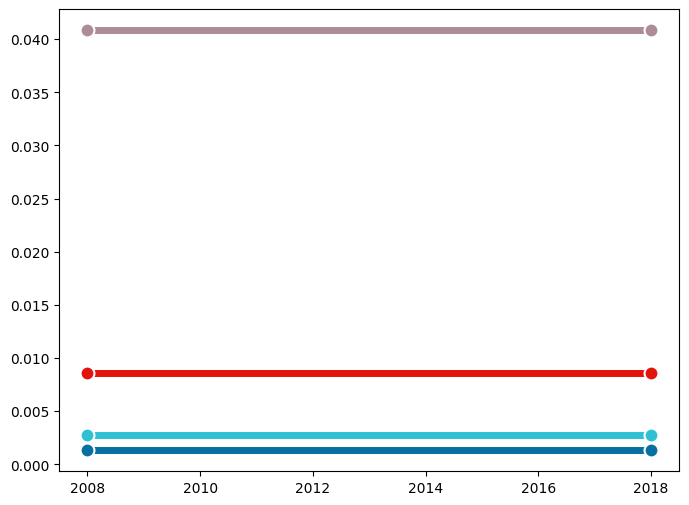

In [56]:
# Initialize plot ------------------------------------------
fig, ax = plt.subplots(figsize=(8, 6))

# Add lines with dots
# Note the zorder to have dots be on top of the lines
for percentage, color in zip(percentages, COLORS):
    ax.plot(year, percentage, color=color, lw=5)
    ax.scatter(year, percentage, fc=color, s=100, lw=1.5, ec="white", zorder=12)

In [22]:
# aggregate times per mode of transportation

##### PERCENTS GO INTO THE Y AXIS
# % Workers 16 Years and Over in Households: No Vehicle Available,PCT_ACS09_5yr_B08014002
# % Workers 16 Years and Over in Households: 1 Vehicle Available,PCT_ACS09_5yr_B08014003
# % Workers 16 Years and Over in Households: 2 Vehicles Available,PCT_ACS09_5yr_B08014004
# % Workers 16 Years and Over in Households: 3 Vehicles Available,PCT_ACS09_5yr_B08014005
# % Workers 16 Years and Over in Households: 4 Vehicles Available,PCT_ACS09_5yr_B08014006
# % Workers 16 Years and Over in Households: 5 or More Vehicles Available,PCT_ACS09_5yr_B08014007

# "% Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Car, Truck, or Van - Drove Alone",PCT_ACS09_5yr_C08136002
# "% Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Car, Truck, or Van - Carpooled",PCT_ACS09_5yr_C08136003
# % Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Public Transportation (Excluding Taxicab),PCT_ACS09_5yr_C08136004
# "% Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Taxicab, Motorcycle, Bicycle, Walked, or Other Means",PCT_ACS09_5yr_C08136005

##### 
# "Workers Whose Means of Transportation Is Car, Truck, or Van: Aggregate Number of Vehicles (Car, Truck, or Van) Used in Commuting",ACS09_5yr_B08015001


# % Workers 16 Years and Over Who Did Not Work At Home: Less than 10 Minutes,PCT_ACS09_5yr_C08134002
# % Workers 16 Years and Over Who Did Not Work At Home: 10 to 14 Minutes.1,PCT_ACS09_5yr_C08134003
# % Workers 16 Years and Over Who Did Not Work At Home: 15 to 19 Minutes.1,PCT_ACS09_5yr_C08134004
# % Workers 16 Years and Over Who Did Not Work At Home: 20 to 24 Minutes.1,PCT_ACS09_5yr_C08134005
# % Workers 16 Years and Over Who Did Not Work At Home: 25 to 29 Minutes.1,PCT_ACS09_5yr_C08134006
# % Workers 16 Years and Over Who Did Not Work At Home: 30 to 34 Minutes.1,PCT_ACS09_5yr_C08134007
# % Workers 16 Years and Over Who Did Not Work At Home: 35 to 44 Minutes,PCT_ACS09_5yr_C08134008
# % Workers 16 Years and Over Who Did Not Work At Home: 45 to 59 Minutes.1,PCT_ACS09_5yr_C08134009
# % Workers 16 Years and Over Who Did Not Work At Home: 60 or More Minutes,PCT_ACS09_5yr_C08134010
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone.1",PCT_ACS09_5yr_C08134011
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone: Less than 10 Minutes",PCT_ACS09_5yr_C08134012
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone: 10 to 14 Minutes",PCT_ACS09_5yr_C08134013
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone: 15 to 19 Minutes",PCT_ACS09_5yr_C08134014
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone: 20 to 24 Minutes",PCT_ACS09_5yr_C08134015
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone: 25 to 29 Minutes",PCT_ACS09_5yr_C08134016
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone: 30 to 34 Minutes",PCT_ACS09_5yr_C08134017
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone: 35 to 44 Minutes",PCT_ACS09_5yr_C08134018
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone: 45 to 59 Minutes",PCT_ACS09_5yr_C08134019
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone: 60 or More Minutes",PCT_ACS09_5yr_C08134020
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled.1",PCT_ACS09_5yr_C08134021
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled: Less than 10 Minutes",PCT_ACS09_5yr_C08134022
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled: 10 to 14 Minutes",PCT_ACS09_5yr_C08134023
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled: 15 to 19 Minutes",PCT_ACS09_5yr_C08134024
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled: 20 to 24 Minutes",PCT_ACS09_5yr_C08134025
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled: 25 to 29 Minutes",PCT_ACS09_5yr_C08134026
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled: 30 to 34 Minutes",PCT_ACS09_5yr_C08134027
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled: 35 to 44 Minutes",PCT_ACS09_5yr_C08134028
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled: 45 to 59 Minutes",PCT_ACS09_5yr_C08134029
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled: 60 or More Minutes",PCT_ACS09_5yr_C08134030
# % Workers 16 Years and Over Who Did Not Work At Home: Public Transportation (Excluding Taxicab).1,PCT_ACS09_5yr_C08134031
# % Workers 16 Years and Over Who Did Not Work At Home: Public Transportation (Excluding Taxicab): Less than 10 Minutes,PCT_ACS09_5yr_C08134032
# % Workers 16 Years and Over Who Did Not Work At Home: Public Transportation (Excluding Taxicab): 10 to 14 Minutes,PCT_ACS09_5yr_C08134033
# % Workers 16 Years and Over Who Did Not Work At Home: Public Transportation (Excluding Taxicab): 15 to 19 Minutes,PCT_ACS09_5yr_C08134034
# % Workers 16 Years and Over Who Did Not Work At Home: Public Transportation (Excluding Taxicab): 20 to 24 Minutes,PCT_ACS09_5yr_C08134035
# % Workers 16 Years and Over Who Did Not Work At Home: Public Transportation (Excluding Taxicab): 25 to 29 Minutes,PCT_ACS09_5yr_C08134036
# % Workers 16 Years and Over Who Did Not Work At Home: Public Transportation (Excluding Taxicab): 30 to 34 Minutes,PCT_ACS09_5yr_C08134037
# % Workers 16 Years and Over Who Did Not Work At Home: Public Transportation (Excluding Taxicab): 35 to 44 Minutes,PCT_ACS09_5yr_C08134038
# % Workers 16 Years and Over Who Did Not Work At Home: Public Transportation (Excluding Taxicab): 45 to 59 Minutes,PCT_ACS09_5yr_C08134039
# % Workers 16 Years and Over Who Did Not Work At Home: Public Transportation (Excluding Taxicab): 60 or More Minutes,PCT_ACS09_5yr_C08134040
# "% Workers 16 Years and Over Who Did Not Work At Home: Taxicab, Motorcycle, Bicycle,  Walked, or Other Means",PCT_ACS09_5yr_C08134041
# "% Workers 16 Years and Over Who Did Not Work At Home: Taxicab, Motorcycle, Bicycle,  Walked, or Other Means: Less than 10 Minutes",PCT_ACS09_5yr_C08134042
# "% Workers 16 Years and Over Who Did Not Work At Home: Taxicab, Motorcycle, Bicycle,  Walked, or Other Means: 10 to 14 Minutes",PCT_ACS09_5yr_C08134043
# "% Workers 16 Years and Over Who Did Not Work At Home: Taxicab, Motorcycle, Bicycle,  Walked, or Other Means: 15 to 19 Minutes",PCT_ACS09_5yr_C08134044
# "% Workers 16 Years and Over Who Did Not Work At Home: Taxicab, Motorcycle, Bicycle,  Walked, or Other Means: 20 to 24 Minutes",PCT_ACS09_5yr_C08134045
# "% Workers 16 Years and Over Who Did Not Work At Home: Taxicab, Motorcycle, Bicycle,  Walked, or Other Means: 25 to 29 Minutes",PCT_ACS09_5yr_C08134046
# "% Workers 16 Years and Over Who Did Not Work At Home: Taxicab, Motorcycle, Bicycle,  Walked, or Other Means: 30 to 34 Minutes",PCT_ACS09_5yr_C08134047
# "% Workers 16 Years and Over Who Did Not Work At Home: Taxicab, Motorcycle, Bicycle,  Walked, or Other Means: 35 to 44 Minutes",PCT_ACS09_5yr_C08134048
# "% Workers 16 Years and Over Who Did Not Work At Home: Taxicab, Motorcycle, Bicycle,  Walked, or Other Means: 45 to 59 Minutes",PCT_ACS09_5yr_C08134049
# "% Workers 16 Years and Over Who Did Not Work At Home: Taxicab, Motorcycle, Bicycle,  Walked, or Other Means: 60 or More Minutes",PCT_ACS09_5yr_C08134050

In [23]:
df_2009['PCT_ACS09_5yr_B08131002']

KeyError: 'PCT_ACS09_5yr_B08131002'